Heart disease classification/prediction miniproject TYCSE sem-6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle

visualizing data into dataframe

In [ ]:
# column_names=['age','sex','chest pain type','resting blood pressure','serum cholestoral in mg/dl','fasting blood sugar>120 mg/dl','resting electrocardiographic results','maximum heart rate achieved','exercise induced angina','oldpeak','the slope of the peak exercise ST segment','number of major vessels (0-3) colored by flourosopy','thal','status']
heart_disease = pd.read_csv("/content/heart.csv")
heart_disease.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Preprocessing and encoding steps

In [ ]:
# Preprocessing: Encoding categorical variables, handling missing values, etc.
heart_disease['ChestPainType']=heart_disease['ChestPainType'].map({'TA':1,'ATA':2,'NAP':3,'ASY':4})
heart_disease['RestingECG']=heart_disease['RestingECG'].map({'Normal':1,'ST':2,'LVH':3})
heart_disease['ExerciseAngina']=heart_disease['ExerciseAngina'].map({'N':0,'Y':1,'Yes':1})
heart_disease['ST_Slope']=heart_disease['ST_Slope'].map({'Up':1,'Flat':0.5,'Down':0})

In [ ]:
heart_disease.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,1,172,0,0.0,1.0,0
1,49,F,3,160,180,0,1,156,0,1.0,0.5,1
2,37,M,2,130,283,0,2,98,0,0.0,1.0,0
3,48,F,4,138,214,0,1,108,1,1.5,0.5,1
4,54,M,3,150,195,0,1,122,0,0.0,1.0,0
5,39,M,3,120,339,0,1,170,0,0.0,1.0,0
6,45,F,2,130,237,0,1,170,0,0.0,1.0,0
7,54,M,2,110,208,0,1,142,0,0.0,1.0,0
8,37,M,4,140,207,0,1,130,1,1.5,0.5,1
9,48,F,2,120,284,0,1,120,0,0.0,1.0,0


Visualizing correlation between features

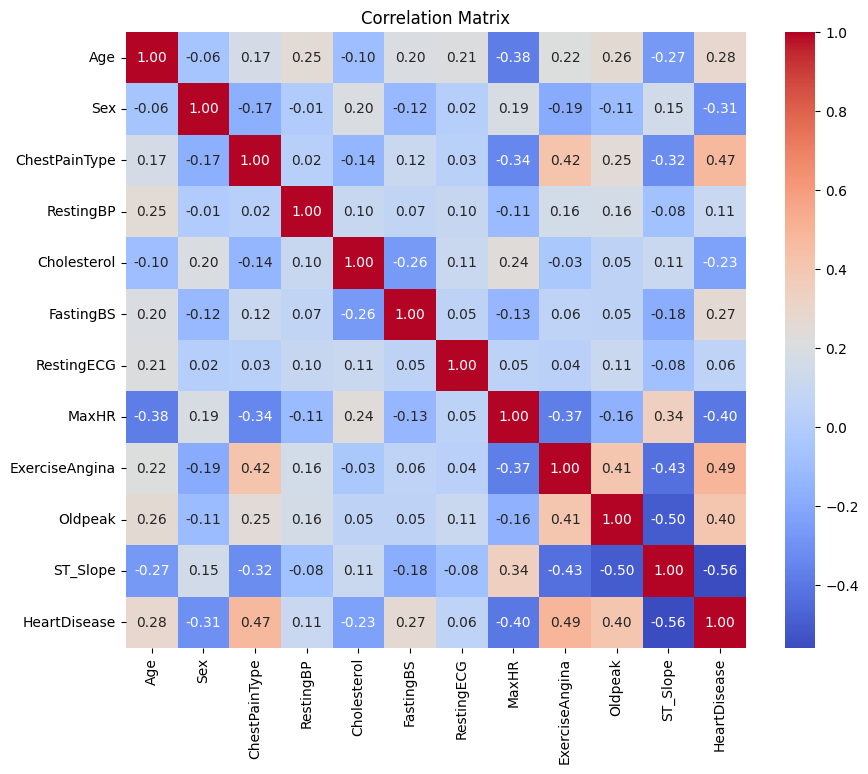

In [ ]:
# Encode 'Sex' column to numerical values
heart_disease['Sex'] = heart_disease['Sex'].map({'M': 0, 'F': 1})

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Splitting data

In [ ]:
# Split the data into features and target variable
X = heart_disease.drop(['HeartDisease', 'Sex'], axis=1)
y = heart_disease['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

Initializing classification models

In [ ]:
# Initialize multiple classification models
models = {
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=55),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=55),
    'Decision Tree': DecisionTreeClassifier(random_state=55),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=55),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=55),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=55),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=55),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=55),
    'Voting Classifier': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC(probability=True))], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('svm', SVC(probability=True)), ('nb', GaussianNB())], final_estimator=LogisticRegression())
}

Training each model

In [ ]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation and model comparision

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


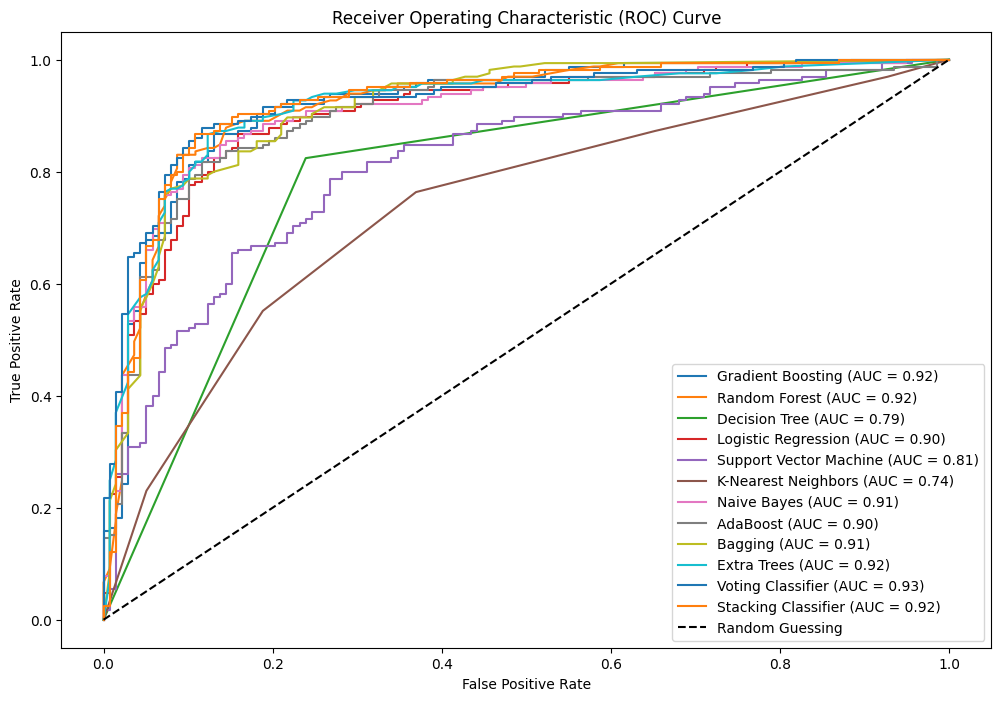

Model Performance:
Gradient Boosting: Accuracy = 0.858085808580858
Random Forest: Accuracy = 0.8514851485148515
Decision Tree: Accuracy = 0.7953795379537953
Logistic Regression: Accuracy = 0.8382838283828383
Support Vector Machine: Accuracy = 0.7557755775577558
K-Nearest Neighbors: Accuracy = 0.7029702970297029
Naive Bayes: Accuracy = 0.8481848184818482
AdaBoost: Accuracy = 0.8415841584158416
Bagging: Accuracy = 0.8448844884488449
Extra Trees: Accuracy = 0.858085808580858
Voting Classifier: Accuracy = 0.8646864686468647
Stacking Classifier: Accuracy = 0.8745874587458746


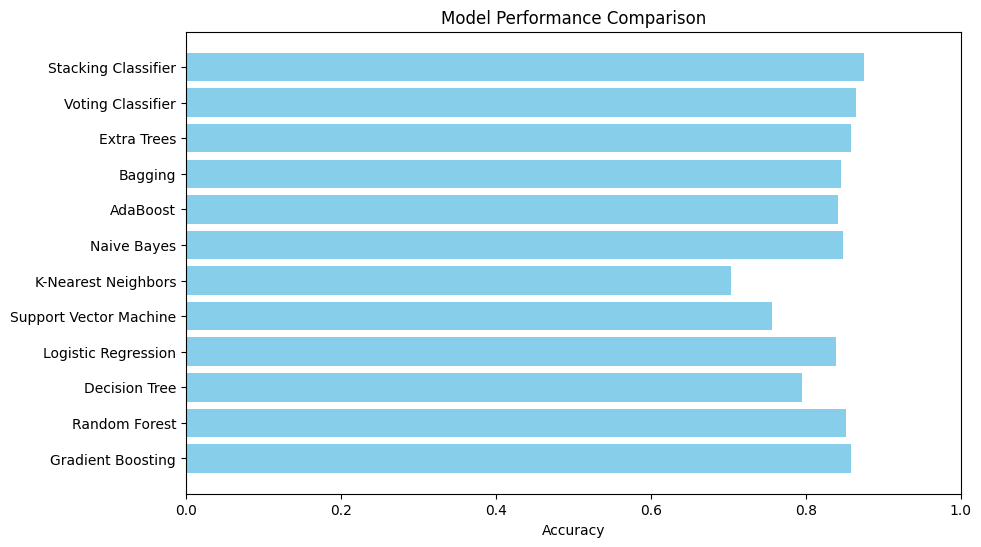


Best model: Stacking Classifier


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

"""Evaluation and model comparision"""
# Calculate AUC and plot ROC curve for each model
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
# Performance of each model
print("Model Performance:")
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')

# Plot model performance comparison
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)
plt.show()

# Performance comparison
best_model = max(results, key=results.get)
print(f'\nBest model: {best_model}')

# Save the best model
best_model_instance = models[best_model]
pickle.dump(best_model_instance, open('best_model_heart_disease.pkl', 'wb'))


In [ ]:
!pip install transformers
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
# #tried NLP part
# from transformers import pipeline
# import ipywidgets as widgets
# from IPython.display import display
# import PyPDF2
# from io import BytesIO

# # Load NER pipeline using DistilBERT
# ner_pipeline = pipeline("ner", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")

# def extract_parameters_nlp(report):
#     # Perform NER on the report text
#     ner_results = ner_pipeline(report)

#     # Initialize dictionary to store extracted parameter values
#     parameters = {
#         'age': None,
#         'sex': None,
#         'chest_pain_type': None,
#         'resting_blood_pressure': None,
#         'serum_cholesterol': None,
#         'fasting_blood_sugar': None,
#         'resting_electrocardiographic_results': None,
#         'maximum_heart_rate': None,
#         'exercise_induced_angina': None,
#         'oldpeak': None,
#         'slope_of_peak_exercise_ST_segment': None,
#         'num_major_vessels': None,
#         'thal': None
#     }

#     # Extract parameter values from NER results
#     for result in ner_results:
#         word = result['word'].lower()
#         entity = result['entity']

#         # Age
#         if 'age' in word and entity == 'CARDINAL':
#             parameters['age'] = int(word)
#         # Sex
#         elif 'sex' in word and entity == 'MISC':
#             parameters['sex'] = result['word']
#         # Chest Pain Type
#         elif 'chest' in word and 'pain' in word and entity == 'MISC':
#             parameters['chest_pain_type'] = result['word']
#         # Resting Blood Pressure
#         elif 'resting' in word and 'blood' in word and 'pressure' in word and entity == 'CARDINAL':
#             parameters['resting_blood_pressure'] = int(word)
#         # Serum Cholesterol
#         elif 'serum' in word and 'cholestoral' in word and entity == 'CARDINAL':
#             parameters['serum_cholesterol'] = int(word)
#         # Fasting Blood Sugar
#         elif 'fasting' in word and 'blood' in word and 'sugar' in word and entity == 'CARDINAL':
#             parameters['fasting_blood_sugar'] = int(word)
#         # Resting Electrocardiographic Results
#         elif 'resting' in word and 'electrocardiographic' in word and 'results' in word and entity == 'MISC':
#             parameters['resting_electrocardiographic_results'] = result['word']
#         # Maximum Heart Rate
#         elif 'maximum' in word and 'heart' in word and 'rate' in word and entity == 'CARDINAL':
#             parameters['maximum_heart_rate'] = int(word)
#         # Exercise Induced Angina
#         elif 'exercise' in word and 'induced' in word and 'angina' in word and entity == 'MISC':
#             parameters['exercise_induced_angina'] = result['word']
#         # Oldpeak
#         elif 'oldpeak' in word and entity == 'CARDINAL':
#             parameters['oldpeak'] = float(word)
#         # Slope of Peak Exercise ST Segment
#         elif 'slope' in word and 'peak' in word and 'exercise' in word and 'st' in word and 'segment' in word and entity == 'MISC':
#             parameters['slope_of_peak_exercise_ST_segment'] = result['word']
#         # Number of Major Vessels
#         elif 'number' in word and 'major' in word and 'vessels' in word and entity == 'CARDINAL':
#             parameters['num_major_vessels'] = int(word)
#         # Thal
#         elif 'thal' in word and entity == 'MISC':
#             parameters['thal'] = result['word']

#     return parameters

# def handle_pdf_upload(change):
#     uploaded_file = change['new']
#     pdf_text = extract_text_from_pdf(uploaded_file)
#     parameters = extract_parameters_nlp(pdf_text)
#     print("Extracted Parameters:")
#     for param, value in parameters.items():
#         print(param.capitalize() + ":", value)

# def extract_text_from_pdf(uploaded_file):
#     # Read the content of the uploaded PDF file
#     pdf_content = uploaded_file[list(uploaded_file.keys())[0]]['content']

#     # Create a BytesIO object from the content
#     pdf_bytes = BytesIO(pdf_content)

#     # Create a PdfReader object from the BytesIO object
#     pdf_reader = PyPDF2.PdfReader(pdf_bytes)

#     # Initialize an empty string to store the extracted text
#     text = ""

#     # Extract text from each page of the PDF file
#     for page_num in range(len(pdf_reader.pages)):
#         text += pdf_reader.pages[page_num].extract_text()

#     return text

# # Create file upload widget
# uploader = widgets.FileUpload(accept='.pdf', description='Upload PDF')

# # Attach event handler for file upload
# uploader.observe(handle_pdf_upload, names='value')

# # Display file upload widget
# display(uploader)


In [ ]:
!pip install fitz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 13.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import ipywidgets as widgets
from IPython.display import display
import fitz  # PyMuPDF
import io
import re

def extract_parameters_nlp(report):
    parameters = {
        'age': None,
        'sex': None,
        'chest_pain_type': None,
        'resting_blood_pressure': None,
        'serum_cholesterol': None,
        'fasting_blood_sugar': None,
        'resting_electrocardiographic_results': None,
        'maximum_heart_rate': None,
        'exercise_induced_angina': None,
        'oldpeak': None,
        'slope_of_peak_exercise_ST_segment': None
    }

    # Define keyword patterns and regular expressions
    keyword_patterns = {
        'age': r'age\s*:\s*(\d+)',
        'sex': r'sex\s*:\s*(male|female)',
        'chest_pain_type': r'chest\s+pain\s+type\s*:\s*(\w+)',
        'resting_blood_pressure': r'resting\s+blood\s+pressure\s*:\s*(\d+)',
        'serum_cholesterol': r'serum\s+cholesterol\s*:\s*(\d+)',
        'fasting_blood_sugar': r'fasting\s+blood\s+sugar\s*:\s*(\d+)',
        'resting_electrocardiographic_results': r'resting\s+electrocardiographic\s+results\s*:\s*(\w+)',
        'maximum_heart_rate': r'maximum\s+heart\s+rate\s+achieved\s*:\s*(\d+)',
        'exercise_induced_angina': r'Exercise\s+Induced\s+Angina\s*:\s*(y|n)',
        'oldpeak': r'oldpeak\s*:\s*(\d+(\.\d+)?)',
        'slope_of_peak_exercise_ST_segment': r'slope\s+of\s+peak\s+exercise\s+ST\s+segment\s*:\s*(\w+)',
        # 'num_major_vessels': r'number\s+of\s+major\s+vessels\s*:\s*(\d+)',
        # 'thal': r'thal\s*:\s*(\w+)'
    }

    # Search for parameter values using regex patterns
    for param, pattern in keyword_patterns.items():
        match = re.search(pattern, report, re.IGNORECASE)
        print(match)
        if match:
            parameters[param] = match.group(1).strip()

    return parameters
def preprocess_parameters(parameters):
    # Mapping dictionaries for categorical variables
    chest_pain_type_mapping = {'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4}
    resting_ecg_mapping = {'Normal': 1, 'ST': 2, 'LVH': 3}
    exercise_angina_mapping = {'n': 0, 'y': 1}
    st_slope_mapping = {'Up': 1, 'Flat': 0.5, 'Down': 0}

    # Update parameters with preprocessed values
    parameters['chest_pain_type'] = chest_pain_type_mapping.get(parameters.get('chest_pain_type', ''), '')
    parameters['resting_electrocardiographic_results'] = resting_ecg_mapping.get(parameters.get('resting_electrocardiographic_results', ''), '')
    parameters['exercise_induced_angina'] = exercise_angina_mapping.get(parameters.get('exercise_induced_angina', ''), '')
    parameters['slope_of_peak_exercise_ST_segment'] = st_slope_mapping.get(parameters.get('slope_of_peak_exercise_ST_segment', ''), '')

    return parameters
def handle_pdf_upload(change):
    uploaded_file = change['new']
    pdf_text = extract_text_from_pdf(uploaded_file)
    global patient_values
    parameters = extract_parameters_nlp(pdf_text)
    mapped_para=preprocess_parameters(parameters)
    patient_values = mapped_para
    print("Extracted Parameters:")
    for param, value in parameters.items():
        print(param.capitalize() + ":", value)


def extract_text_from_pdf(uploaded_file):
    # Read the content of the uploaded PDF file
    pdf_content = uploaded_file[list(uploaded_file.keys())[0]]['content']

    # Create a BytesIO object from the content
    pdf_bytes = io.BytesIO(pdf_content)

    # Create a PdfReader object from the BytesIO object
    doc = fitz.open(stream=pdf_bytes, filetype="pdf")

    # Initialize an empty string to store the extracted text
    text = ""

    # Extract text from each page of the PDF file
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text += page.get_text()

    print("Extracted Text:")
    print(text)

    return text
# Create file upload widget
uploader = widgets.FileUpload(accept='.pdf', description='Upload PDF')

# Attach event handler for file upload
uploader.observe(handle_pdf_upload, names='value')

# Display file upload widget
display(uploader)


FileUpload(value={}, accept='.pdf', description='Upload PDF')

Extracted Text:
Patient Report 
 
Patient Information: 
Age: 55 
Sex: male 
 
Clinical Findings: 
Chest Pain Type: ATA 
Resting Blood Pressure: 140 mmHg 
Serum Cholesterol: 220 mg/dL 
Fasting Blood Sugar: 120 mg/dL 
Resting Electrocardiographic Results: ST 
Maximum Heart Rate Achieved: 160 bpm 
Exercise Induced Angina: y 
Oldpeak: 2.5 
Slope of Peak Exercise ST Segment: Down 
Number of Major Vessels (0-3) Colored by Flourosopy: 2 
Thal: reversible defect 
 
Conclusion: 
The patient presents with atypical angina and ST-T wave abnormality on resting electrocardiogram. 
Resting blood pressure is elevated at 140 mmHg, with a serum cholesterol level of 220 mg/dL. 
Fasting blood sugar is within normal limits at 120 mg/dL. The patient achieved a maximum heart rate 
of 160 bpm during exercise, experiencing angina. The ST segment showed downsloping during peak 
exercise. Coronary angiography reveals two major vessels colored by flourosopy with a reversible 
defect in thal. Further evaluation an

In [ ]:
# # User input
# age = float(input("Enter Your Age: "))
# chest_pain_type = float(input("Enter Your Chest Pain Type (0-4): "))
# resting_blood_pressure = float(input("Enter Your Resting Blood Pressure: "))
# serum_cholestrol = float(input("Enter Your Serum Cholestoral In mg/dl: "))
# fasting_blood_sugar = float(input("Enter Your Fasting Blood Sugar: "))
# resting_electrocardiographic_results = float(input("Enter Your Resting Electrocardiographic Results (0, 1, 2): "))
# maximum_heart_rate_achieved = float(input("Enter Your Maximum Heart Rate Achieved: "))
# exercise_induced_angina = float(input("Enter Your Exercise Induced Angina: "))
# oldpeak = float(input("Enter Your Oldpeak: "))
# slope_of_the_peak_exercise_ST_segment = float(input("Enter The Slope Of The Peak Exercise ST Segment: "))

# input_data = pd.DataFrame(columns=['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
#                                    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
# input_data.loc[0] = [age, chest_pain_type, resting_blood_pressure, serum_cholestrol, fasting_blood_sugar,
#                      resting_electrocardiographic_results, maximum_heart_rate_achieved, exercise_induced_angina,
#                      oldpeak, slope_of_the_peak_exercise_ST_segment]


Taking user input

In [ ]:
input_data = pd.DataFrame(columns=['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                                   'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
input_data.loc[0] = [patient_values['age'], patient_values['chest_pain_type'], patient_values['resting_blood_pressure'],
                      patient_values['serum_cholesterol'], patient_values['fasting_blood_sugar'],
                      patient_values['resting_electrocardiographic_results'], patient_values['maximum_heart_rate'],
                      patient_values['exercise_induced_angina'], patient_values['oldpeak'],
                      patient_values['slope_of_peak_exercise_ST_segment']]


predicting using models

In [ ]:
import numpy as np
import pickle

# Define default values for non-numeric columns
default_values = {
    'ChestPainType': 2,
    'RestingECG': 1,
    'ExerciseAngina': 0,
    'ST_Slope': 0.5
}

# Replace non-numeric values with default values for specific columns
for column, default_value in default_values.items():
    if input_data[column].dtype == object:
        input_data[column] = pd.to_numeric(input_data[column], errors='coerce').fillna(default_value)

# best_model_loaded = pickle.load('/content/best_model_heart_disease.pkl')
with open('best_model_heart_disease.pkl', 'rb') as file:
    best_model_loaded = pickle.load(file)

# Predict probabilities instead of class labels to get range of risk
probabilities = best_model_loaded.predict_proba(input_data)

# Define thresholds for risk levels
high_threshold = 0.8
low_threshold = 0.4

# Categorize predictions into risk levels
if probabilities[0][1] >= high_threshold:
    risk_level = "High Risk!!!"
elif probabilities[0][1] >= low_threshold:
    risk_level = "Mild Risk!!"
else:
    risk_level = "Low Risk!"

# Output risk level
print(f"Risk Level: {risk_level}")

Risk Level: High Risk!!!


Sample inputs

In [ ]:
#sample inputs
#41
# male
# 2
# 130
# 172
# 0
# 1
# 130
# 0
# 2
# 0.5
